In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("final_ka_final2.csv")
data.head()

,Year,SEQN,DR1IGRMS,DR1_020,DR1IKCAL,DR1ISUGR,DR1ITFAT,DR1ICHOL,DR1IALCO,RIAGENDR,RIDRETH1,INDFMPIR,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,PAD080
0,2003-04,21017.0,178.0,47700.0,313.0,1.140000e+00,1.484000e+01,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
1,2003-04,21017.0,4.2,39600.0,16.0,4.200000e+00,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
2,2003-04,21017.0,93.0,39600.0,315.0,2.080000e+01,9.150000e+00,4.000000e+01,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
3,2003-04,21017.0,243.0,47700.0,211.0,7.180000e+00,3.630000e+00,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
4,2003-04,21017.0,253.3,39600.0,5.0,5.397605e-79,1.000000e-02,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0


In [4]:
data.drop(columns=["Year"],inplace=True)

In [5]:
data

,SEQN,DR1IGRMS,DR1_020,DR1IKCAL,DR1ISUGR,DR1ITFAT,DR1ICHOL,DR1IALCO,RIAGENDR,RIDRETH1,INDFMPIR,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,PAD080
0,21017.0,178.00,47700.0,313.0,1.140000e+00,1.484000e+01,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
1,21017.0,4.20,39600.0,16.0,4.200000e+00,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
2,21017.0,93.00,39600.0,315.0,2.080000e+01,9.150000e+00,4.000000e+01,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
3,21017.0,243.00,47700.0,211.0,7.180000e+00,3.630000e+00,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
4,21017.0,253.30,39600.0,5.0,5.397605e-79,1.000000e-02,5.397605e-79,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24065,41462.0,30.25,30600.0,18.0,1.510000e+00,4.200000e-01,2.000000e+00,5.397605e-79,1.0,3.0,4.83,56.0,75.2,23.71,88.5,20.0
24066,41462.0,710.40,30600.0,7.0,5.397605e-79,1.400000e-01,5.397605e-79,5.397605e-79,1.0,3.0,4.83,56.0,75.2,23.71,88.5,20.0
24067,41462.0,883.75,30600.0,862.0,1.473000e+02,1.415000e+01,4.300000e+01,5.397605e-79,1.0,3.0,4.83,56.0,75.2,23.71,88.5,20.0
24068,41462.0,123.00,48600.0,218.0,3.300000e-01,1.057000e+01,5.397605e-79,5.397605e-79,1.0,3.0,4.83,56.0,75.2,23.71,88.5,20.0


In [6]:
data.DR1_020.min()

5.397605346934028e-79

In [7]:
data.DR1_020.max()

86340.0

In [8]:
x=data.iloc[:,:].values
x.shape

(24070, 16)

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_norm=ss.fit_transform(x)

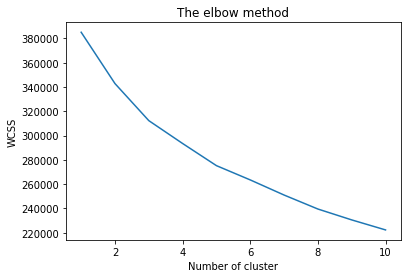

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [12]:
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans=cluster.fit_predict(x_norm)

In [14]:
l={"obese":[]}
for i in data.BMXBMI:
  if i>=30:
    l["obese"].append(1)
  else:
    l["obese"].append(0)

In [15]:
data=pd.concat([data,pd.DataFrame(l)],axis=1)

In [16]:
data.isnull().sum()

SEQN        0
DR1IGRMS    0
DR1_020     0
DR1IKCAL    0
DR1ISUGR    0
DR1ITFAT    0
DR1ICHOL    0
DR1IALCO    0
RIAGENDR    0
RIDRETH1    0
INDFMPIR    0
RIDAGEYR    0
BMXWT       0
BMXBMI      0
BMXWAIST    0
PAD080      0
obese       0
dtype: int64

In [17]:
cluster1=data[y_kmeans==0]
cluster2=data[y_kmeans==1]
cluster3=data[y_kmeans==2]
cluster4=data[y_kmeans==3]
cluster5=data[y_kmeans==4]

In [18]:
cluster1

,SEQN,DR1IGRMS,DR1_020,DR1IKCAL,DR1ISUGR,DR1ITFAT,DR1ICHOL,DR1IALCO,RIAGENDR,RIDRETH1,INDFMPIR,RIDAGEYR,BMXWT,BMXBMI,BMXWAIST,PAD080,obese
8,21017.0,442.25,68400.0,526.0,5.560000e+00,21.75,178.0,5.397605e-79,2.0,1.0,0.21,37.0,45.1,19.34,77.8,15.0,0
52,21067.0,175.00,46800.0,692.0,5.397605e-79,52.80,211.0,5.397605e-79,1.0,3.0,2.40,25.0,108.3,31.17,107.4,30.0,1
56,21067.0,100.00,63000.0,395.0,5.397605e-79,30.17,120.0,5.397605e-79,1.0,3.0,2.40,25.0,108.3,31.17,107.4,30.0,1
75,21097.0,220.54,45000.0,619.0,7.840000e+00,27.64,56.0,5.397605e-79,2.0,4.0,3.28,23.0,55.3,22.52,77.2,30.0,0
79,21097.0,242.98,75600.0,789.0,6.180000e+00,70.66,131.0,5.397605e-79,2.0,4.0,3.28,23.0,55.3,22.52,77.2,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24011,41444.0,149.10,72000.0,384.0,5.397605e-79,24.48,131.0,5.397605e-79,1.0,2.0,0.31,20.0,105.1,31.04,97.6,15.0,1
24012,41444.0,210.00,64800.0,585.0,3.032000e+01,18.69,86.0,5.397605e-79,1.0,2.0,0.31,20.0,105.1,31.04,97.6,15.0,1
24027,41450.0,122.00,75600.0,410.0,7.860000e+00,31.78,100.0,5.397605e-79,1.0,3.0,5.00,57.0,118.9,32.90,114.7,30.0,1
24053,41462.0,662.50,72000.0,1379.0,3.430000e+00,57.39,105.0,5.397605e-79,1.0,3.0,4.83,56.0,75.2,23.71,88.5,20.0,0


In [19]:
len(cluster1.SEQN.unique())

966

In [20]:
len(cluster2.SEQN.unique())


685

In [21]:
len(cluster3.SEQN.unique())


286

In [22]:
len(cluster4.SEQN.unique())


492

In [23]:
len(cluster5.SEQN.unique())


340

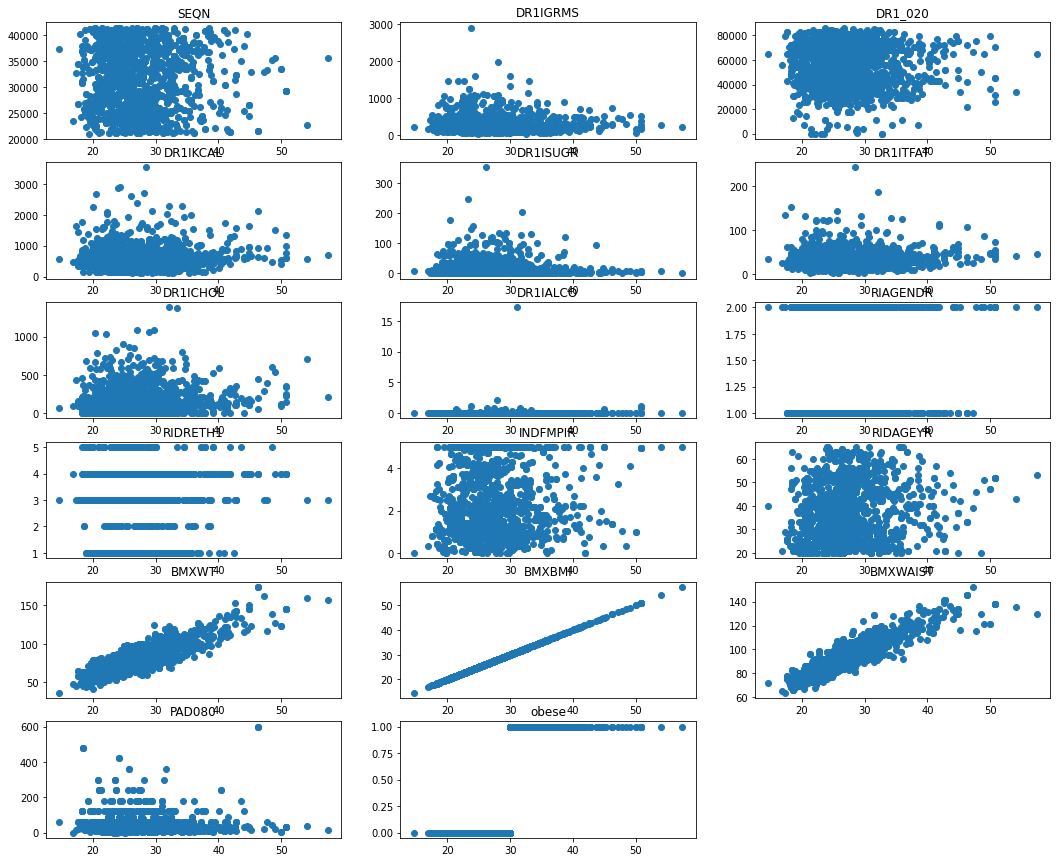

In [24]:
columns=data.columns
plt.figure(figsize=(18,15))
for i in range(len(columns)):
  plt.subplot(len(columns)//3+1,3,i+1)
  plt.scatter(cluster1.BMXBMI.values,cluster1[columns[i]].values)
  plt.title(columns[i])
plt.show()

In [25]:
t=cluster1[["DR1_020","DR1IKCAL"]]

<AxesSubplot:>

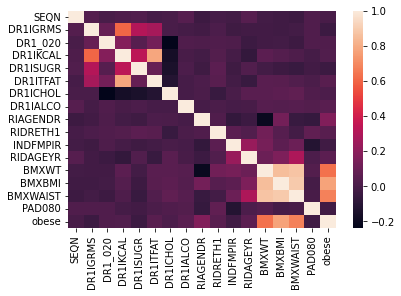

In [26]:
sns.heatmap(cluster1.corr())

<AxesSubplot:>

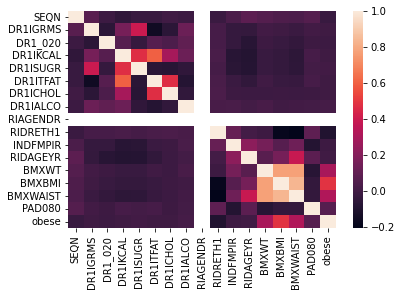

In [27]:
sns.heatmap(cluster2.corr())

<AxesSubplot:>

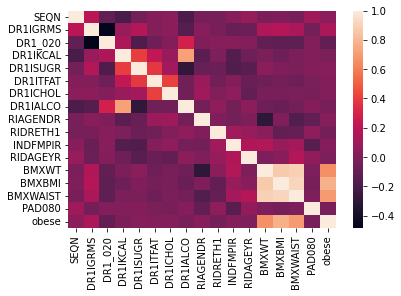

In [28]:
sns.heatmap(cluster3.corr())

<AxesSubplot:>

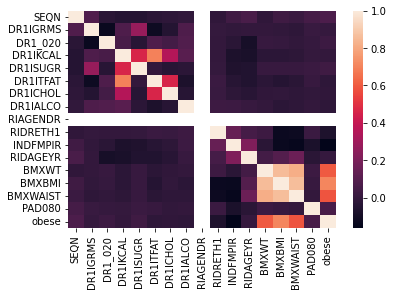

In [29]:
sns.heatmap(cluster4.corr())

<AxesSubplot:>

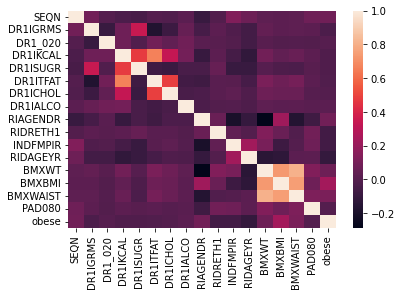

In [30]:
sns.heatmap(cluster5.corr())

In [31]:
heatmap1_data = pd.pivot_table(cluster1, values='DR1IKCAL',
                     columns='DR1_020')

<AxesSubplot:xlabel='DR1_020'>

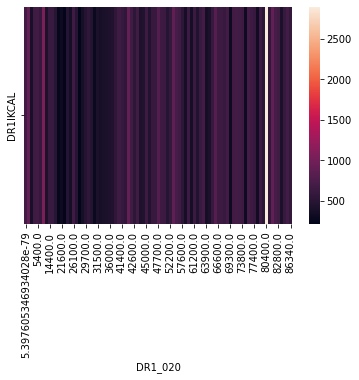

In [32]:
sns.heatmap(heatmap1_data)

In [62]:
eo=data[["DR1_020","DR1IKCAL"]]
eo

,SEQN,DR1_020,DR1IKCAL
0,21017.0,47700.0,313.0
1,21017.0,39600.0,16.0
2,21017.0,39600.0,315.0
3,21017.0,47700.0,211.0
4,21017.0,39600.0,5.0
...,...,...,...
24065,41462.0,30600.0,18.0
24066,41462.0,30600.0,7.0
24067,41462.0,30600.0,862.0
24068,41462.0,48600.0,218.0


In [44]:
x2=eo.values

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x2_norm=ss.fit_transform(x2)

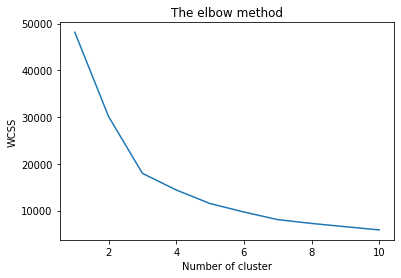

In [46]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x2_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [47]:
from sklearn.cluster import KMeans
c=KMeans(n_clusters=5)
y=c.fit_predict(x2_norm)

In [48]:
c1=eo[y==0]
c2=eo[y==1]
c3=eo[y==2]
c4=eo[y==3]
c5=eo[y==4]

In [49]:
c1

,DR1_020,DR1IKCAL
1,39600.0,16.0
2,39600.0,315.0
3,47700.0,211.0
4,39600.0,5.0
5,47700.0,173.0
...,...,...
24059,48600.0,233.0
24060,48600.0,43.0
24061,48600.0,2.0
24062,48600.0,11.0


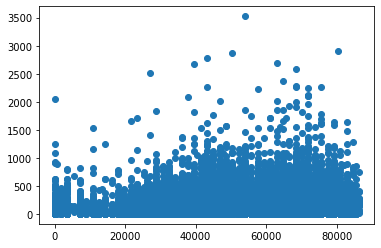

In [61]:
plt.scatter(eo.DR1_020,eo.DR1IKCAL)
plt.show()

In [50]:
print(c1.DR1_020.min(),c1.DR1_020.max())
print(c2.DR1_020.min(),c2.DR1_020.max())
print(c3.DR1_020.min(),c3.DR1_020.max())
print(c4.DR1_020.min(),c4.DR1_020.max())
print(c5.DR1_020.min(),c5.DR1_020.max())

37800.0 58500.0
58500.0 86340.0
5.397605346934028e-79 85500.0
3600.0 86340.0
5.397605346934028e-79 37800.0


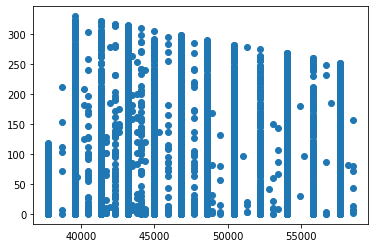

In [51]:
plt.scatter(c1.DR1_020,c1.DR1IKCAL)
plt.show()

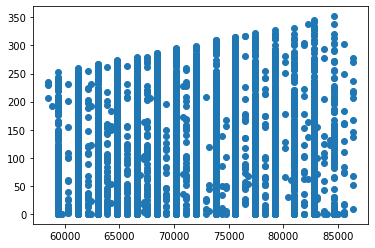

In [52]:
plt.scatter(c2.DR1_020,c2.DR1IKCAL)
plt.show()

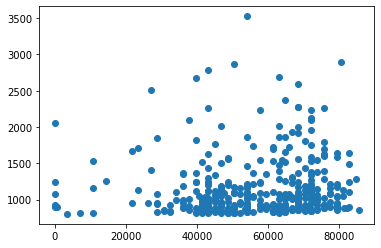

In [53]:
plt.scatter(c3.DR1_020,c3.DR1IKCAL)
plt.show()

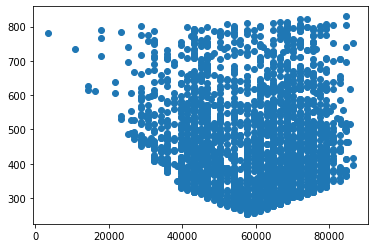

In [54]:
plt.scatter(c4.DR1_020,c4.DR1IKCAL)
plt.show()

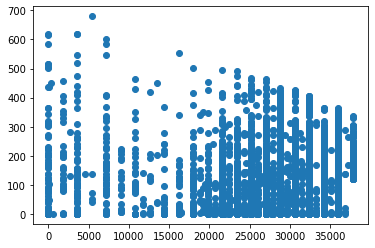

In [55]:
plt.scatter(c5.DR1_020,c5.DR1IKCAL)
plt.show()

<AxesSubplot:xlabel='DR1_020'>

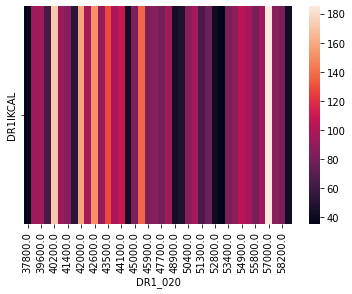

In [56]:
heatmap1_data = pd.pivot_table(c1, values='DR1IKCAL',
                     columns='DR1_020')
sns.heatmap(heatmap1_data)

<AxesSubplot:xlabel='DR1_020'>

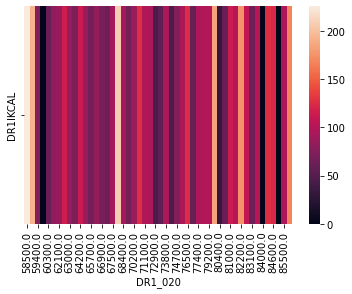

In [57]:
heatmap1_data = pd.pivot_table(c2, values='DR1IKCAL',
                     columns='DR1_020')
sns.heatmap(heatmap1_data)

<AxesSubplot:xlabel='DR1_020'>

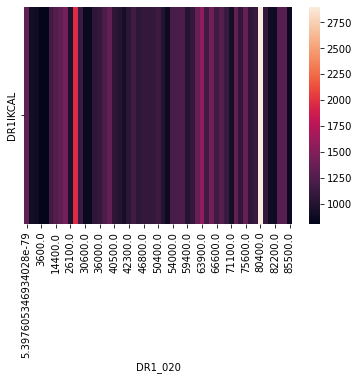

In [58]:
heatmap1_data = pd.pivot_table(c3, values='DR1IKCAL',
                     columns='DR1_020')
sns.heatmap(heatmap1_data)

<AxesSubplot:xlabel='DR1_020'>

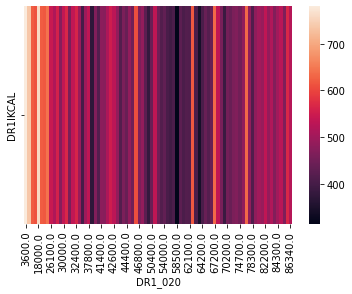

In [59]:
heatmap1_data = pd.pivot_table(c4, values='DR1IKCAL',
                     columns='DR1_020')
sns.heatmap(heatmap1_data)

<AxesSubplot:xlabel='DR1_020'>

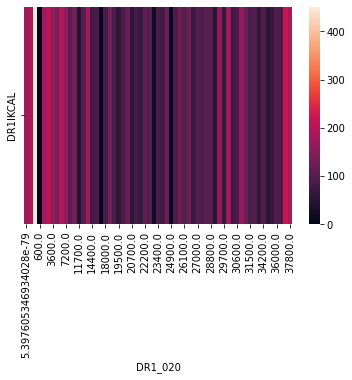

In [60]:
heatmap1_data = pd.pivot_table(c5, values='DR1IKCAL',
                     columns='DR1_020')
sns.heatmap(heatmap1_data)

In [ ]:
new_eo={"time":[],"energy":[]}
for i in data.SEQN.unique():
    n=data[data["SEQN"]==i]
    k=n.groupby("DR1_020")["DR1IKCAL"].sum()
    ls=sorted(list(n["DR1_020"].unique()))
    new_eo["time"]+=ls
    new_eo["energy"]+=list(k)


In [80]:
new_eo=pd.DataFrame(new_eo)
new_eo

,time,energy
0,39600.0,3.790000e+02
1,47700.0,1.054000e+03
2,57600.0,1.060000e+02
3,68400.0,6.370000e+02
4,32400.0,1.370000e+02
...,...,...
7827,30600.0,8.870000e+02
7828,36000.0,5.397605e-79
7829,48600.0,1.061000e+03
7830,72000.0,2.602000e+03


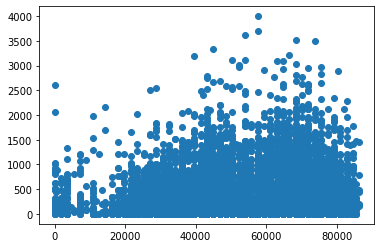

In [81]:
plt.scatter(new_eo.time,new_eo.energy)
plt.show()